<a href="https://colab.research.google.com/github/Vilars/Data110/blob/main/Week5_Tete_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
# load Titanic dataset
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Part 1: Understanding the Dataset
1- Dataset overview
This dataset contains all information of the Titanic passengers. it includes the sex, the ages, the fare, the survvors and where they embark.

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


The dataset provides information about the Titanic passengers. The columns give details about the survival rate, passenger class, sex, age, number of siblings or spouses, number of parents or children, and the port of embarkation. The information provided by the dataset helps to get insight into the Titanic tragedy.

Part 2: Fare and Survival Analysis

2. Fare distribution

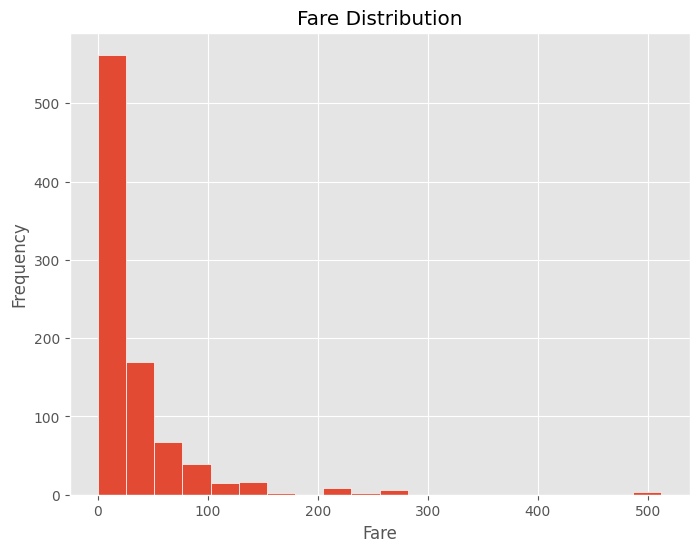

In [4]:
# Histogram plot
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))

plt.hist(titanic['fare'], bins=20, edgecolor='white')

# label and tile
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution')

# show
plt.show()

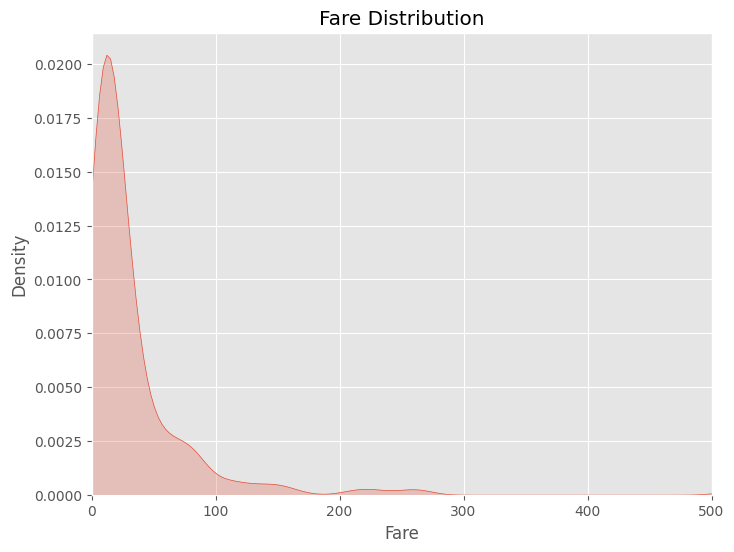

In [5]:
# KDE plot
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
sns.kdeplot(titanic['fare'], fill=True)

# label and tile
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Fare Distribution')
plt.xlim(0, 500)

# show
plt.show()

The graph shows that the fare distributions are heavily skewed, which means most passengers paid lower fares, and a small number paid higher fares.

3. Fare and survival rates

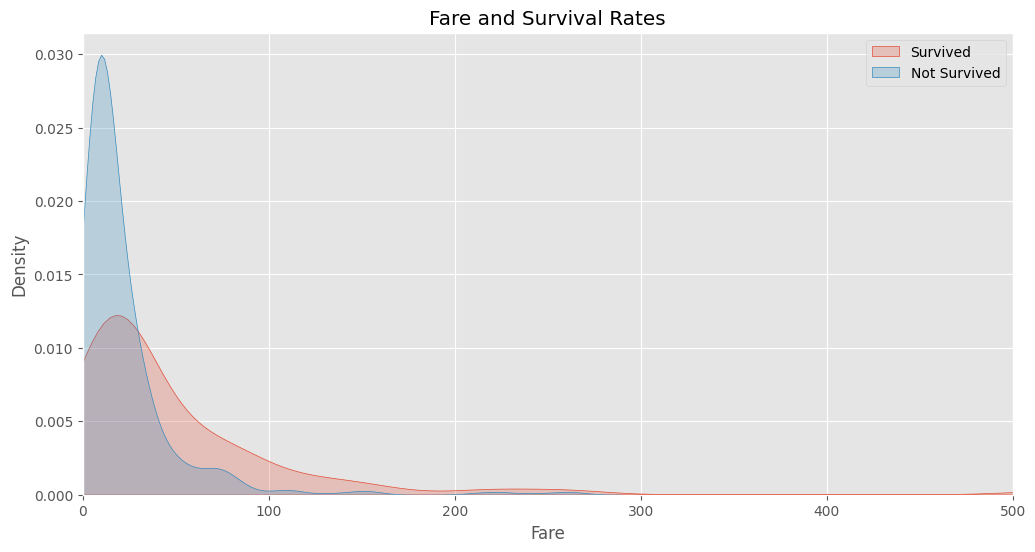

In [ ]:
# kde for survived
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
sns.kdeplot(titanic.loc[titanic['survived'] == 1, 'fare'], fill=True, label='Survived')
sns.kdeplot(titanic.loc[titanic['survived'] == 0, 'fare'], fill=True, label='Not Survived')

plt.xlim(0, 500)

 # title and label
plt.title('Fare and Survival Rates')
plt.xlabel('Fare')
plt.ylabel('Density')

#legend
plt.legend()

# show
plt.show()

The fare influenced the survival rate. Due to the location of their cabin, those who paid a higher fare had a better survival chance.

Part 3: Class, Fare, and Survival Insights
4. Task 4: Passenger Class, Fare, and Survival

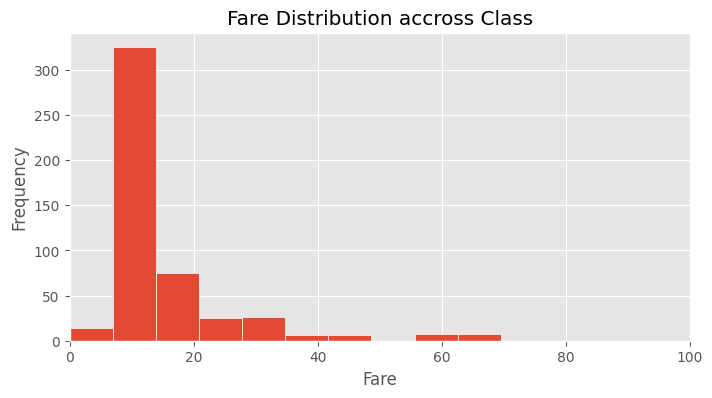

In [ ]:
# histogram
plt.style.use('ggplot')
plt.figure(figsize=(8, 4))
plt.hist(titanic[titanic['pclass']==pclass]['fare'], edgecolor='white')

# title and label
plt.xlim(0, 100)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution accross Class')

# show
plt.show()

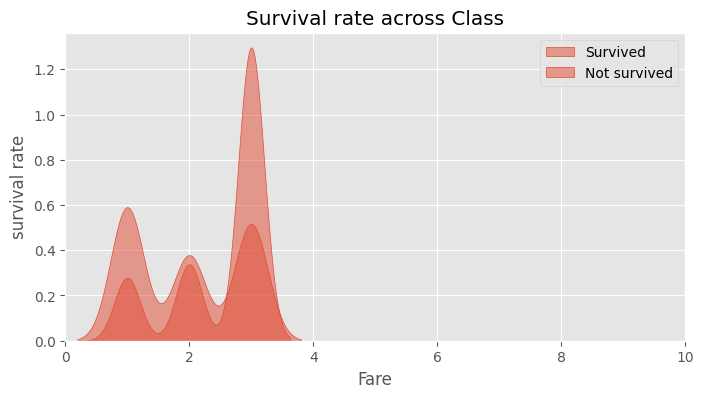

In [14]:
# kde plot
plt.style.use('ggplot')
plt.figure(figsize=(8, 4))
sns.kdeplot(titanic.loc[titanic['survived']==1, ['pclass']], fill=True, alpha=0.5, color='green', label='Survived')
sns.kdeplot(titanic.loc[titanic['survived']==0, ['pclass']], fill=True, alpha=0.5, color='pastel', label='Not survived')

# title and label
plt.xlim(0, 10)
plt.xlabel('Fare')
plt.ylabel('survival rate')
plt.title('Survival rate across Class')


# legend
plt.legend()

# show
plt.show()

In [ ]:
survival_rate = titanic.groupby('pclass')['survived'].mean()
print(survival_rate)


pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


Part 4: Age and Survival
5. Task 5: Age of Survivors and Non-Survivors

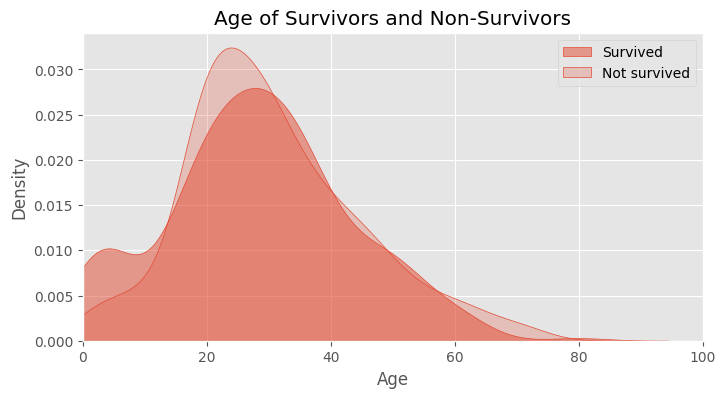

In [17]:
# kde plot
plt.figure(figsize=(8, 4))
sns.kdeplot(titanic.loc[titanic['survived']==1, ['age']], fill=True, color="blue", label='Survived', alpha=0.5)
sns.kdeplot(titanic.loc[titanic['survived']==0, ['age']], color='red', fill=True, label='Not survived')

plt.xlim(0, 100)

# title and label
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age of Survivors and Non-Survivors')

# legend
plt.legend()

# show
plt.show()

the age distribution for survivors suggest that the children had a higher chance of survival compare to the older people. The young adults and the adults survival rates are more varied.

6. Task 6: Pyramid Histogram for Age Survival by Sex



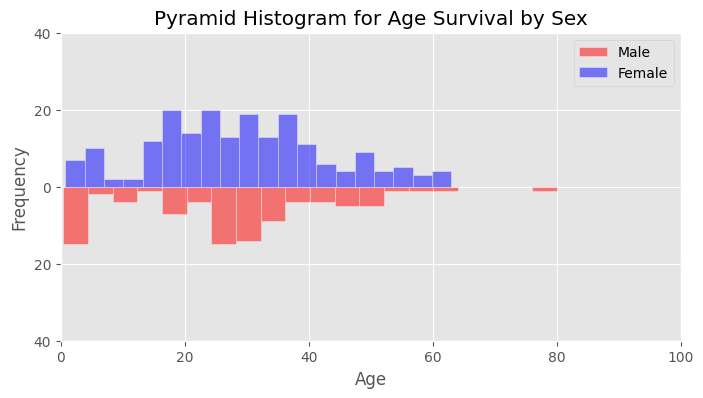

In [6]:

# survived rate
survived = titanic[titanic['survived'] == 1]
not_survived = titanic[titanic['survived'] == 0]

# survived by age and sex
male_survived_age = survived[survived['sex']=='male']['age']
female_survived_age = survived[survived['sex']=='female']['age']

# pyramid
plt.figure(figsize=(8, 4))
plt.style.use('ggplot')
plt.hist(male_survived_age, bins=20, edgecolor='white', label='Male', weights=[-1]*len(male_survived_age), color='red', alpha=0.5)
plt.hist(female_survived_age, bins=20, edgecolor='white', label='Female', color='blue', alpha=0.5)

# label and title
plt.xlim(0, 100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Pyramid Histogram for Age Survival by Sex')

# ticks
plt.yticks([-40, -20, 0, 20, 40], [40, 20, 0, 20, 40])

# legend
plt.legend()

# show
plt.show()

From the age and sex distribution, we can say female and a children have a higher survival rate. Across various group, women have a better chance to survive compared to the male as shown by the taller bars on women side.

Optional Task: Exploring Additional Visualizations
7. Task 7 (Optional): Bar Graph, Line Plot, and Scatter Plot

- Bar graph

<function matplotlib.pyplot.show(close=None, block=None)>

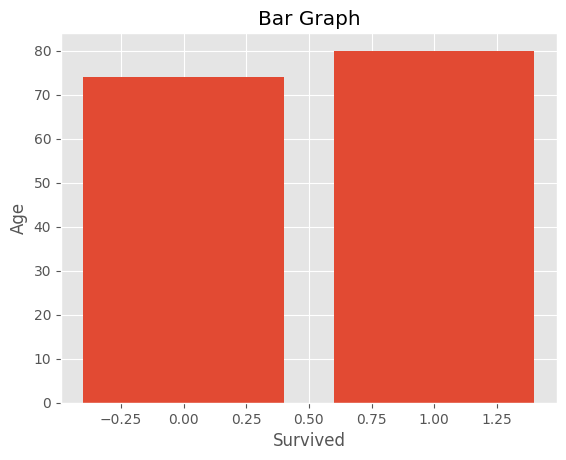

In [18]:
plt.bar(titanic['survived'], titanic['age'])

plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Bar Graph')

# show
plt.show

- Line plot

<function matplotlib.pyplot.show(close=None, block=None)>

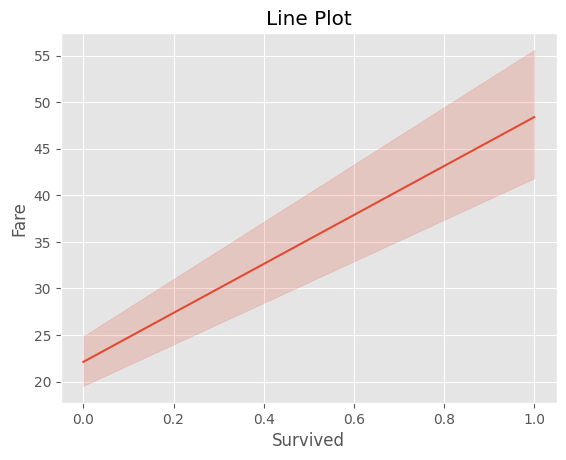

In [22]:
sns.lineplot(x='survived', y='fare', data=titanic)

plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Line Plot')

# show
plt.show

- Scatter plot

<function matplotlib.pyplot.show(close=None, block=None)>

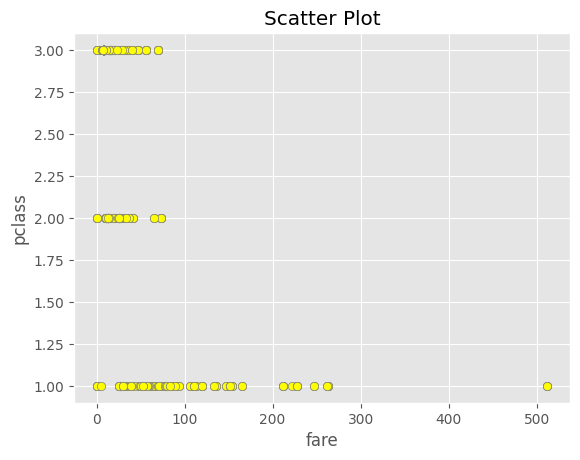

In [36]:
plt.scatter(titanic['fare'], titanic['pclass'],facecolor='yellow', edgecolor='gray')

plt.xlabel('fare')
plt.ylabel('pclass')
plt.title('Scatter Plot')

# show
plt.show